#### 각 시장별 워드 클라우드를 시각화해, 시장별 트렌드를 파악

워드 클라우드를 통한 트렌드파악은, 실시간 변동성이 큰 위험도 3단계와 밀접한 연관이 있을것으로 예상됩니다.

이를 통해 고위험도 종목에 접근할때, 투자선택에 도움을 주는 좀더 많은 정보 확보를 기대합니다.

In [3]:
from wordcloud import WordCloud

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import FinanceDataReader as fdr

In [7]:
from tqdm import tqdm

In [8]:
tqdm.pandas()

In [9]:
from collections import Counter

In [24]:
df = pd.read_csv('pos_score.csv', low_memory=False)

In [25]:
krx_df = fdr.StockListing('KRX')

In [26]:
df['내용2'] = df[['내용_명사_str','형용사_어간','부사_어간','동사_어간']].fillna('').progress_apply(lambda x : ' '.join(x), axis=1)

100%|██████████| 81072/81072 [00:00<00:00, 165124.29it/s]


In [27]:
df.head(2)

,닉네임,날짜,내용,종목,내용_명사,내용_형용사,내용_부사,내용_동사,내용_명사_str,내용_형용사_str,내용_부사_str,내용_동사_str,형용사_어간,부사_어간,동사_어간,긍정점수,내용2
0,GROK,2025-01-11T22:59:18+09:00,- 디자인 변화: S25 울트라는 기존의 각진 디자인에서 둥근 모서리로 변경되었으며...,5930,"['디자인', '변화', '울트라', '기존', '진', '디자인', '모서리', ...","['둥근', '있습니다', '동일한', '있음']",[],"['되었으며', '와', '보입니다']","디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자...","둥근, 있습니다, 동일한, 있음",NaN,"되었으며, 와, 보입니다","둥글다,있다,동일하다,있다",NaN,"되어다,오다,보이다",1,"디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자..."
1,공감아,2025-01-11T22:47:22+09:00,7만원 8만원에 물려있는게 대부분이라 7만원까지 혹여 올라도 물려있던분들은 원금 회...,5930,"['대부분', '혹', '던', '원금', '회복', '시', '다시', '풀', ...",[],[],"['물려있는게', '올라도', '물려있']","대부분, 혹, 던, 원금, 회복, 시, 다시, 풀, 매도, 다시",NaN,NaN,"물려있는게, 올라도, 물려있",NaN,NaN,"물리다,오르다,물리다",-1,"대부분, 혹, 던, 원금, 회복, 시, 다시, 풀, 매도, 다시 물리다,오르다,물리다"


In [12]:
df.head(1)['내용2']

0    디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자...
Name: 내용2, dtype: object

In [28]:
# 종목코드 자릿수손실 : 6자리 채우기
df['종목'] = df['종목'].apply(
    lambda x: f"{x.zfill(6)}" if len(x) < 6 else x
)

In [29]:
# df와 krx_df를 '종목'과 'Code'를 기준으로 병합
df = df.merge(
    krx_df[['Code', 'Market']],
    left_on='종목',
    right_on='Code',
    how='left'
)

# '시장' 열 이름을 변경합니다.
df.rename(columns={'Market': '시장'}, inplace=True)
# '시장' 열의 NaN 값을 'ETF'로 채웁니다.
df['시장'] = df['시장'].fillna('ETF')
# 'Code' 열 삭제 (필요한 경우)
df.drop(columns=['Code'], inplace=True)

In [30]:
df.head(2)

,닉네임,날짜,내용,종목,내용_명사,내용_형용사,내용_부사,내용_동사,내용_명사_str,내용_형용사_str,내용_부사_str,내용_동사_str,형용사_어간,부사_어간,동사_어간,긍정점수,내용2,시장
0,GROK,2025-01-11T22:59:18+09:00,- 디자인 변화: S25 울트라는 기존의 각진 디자인에서 둥근 모서리로 변경되었으며...,005930,"['디자인', '변화', '울트라', '기존', '진', '디자인', '모서리', ...","['둥근', '있습니다', '동일한', '있음']",[],"['되었으며', '와', '보입니다']","디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자...","둥근, 있습니다, 동일한, 있음",NaN,"되었으며, 와, 보입니다","둥글다,있다,동일하다,있다",NaN,"되어다,오다,보이다",1,"디자인, 변화, 울트라, 기존, 진, 디자인, 모서리, 변경, 카메라, 모듈, 디자...",KOSPI
1,공감아,2025-01-11T22:47:22+09:00,7만원 8만원에 물려있는게 대부분이라 7만원까지 혹여 올라도 물려있던분들은 원금 회...,005930,"['대부분', '혹', '던', '원금', '회복', '시', '다시', '풀', ...",[],[],"['물려있는게', '올라도', '물려있']","대부분, 혹, 던, 원금, 회복, 시, 다시, 풀, 매도, 다시",NaN,NaN,"물려있는게, 올라도, 물려있",NaN,NaN,"물리다,오르다,물리다",-1,"대부분, 혹, 던, 원금, 회복, 시, 다시, 풀, 매도, 다시 물리다,오르다,물리다",KOSPI


In [31]:
df.to_csv('pos_score_new.csv', index=False, encoding='utf-8-sig')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81072 entries, 0 to 81071
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   닉네임         81072 non-null  object
 1   날짜          81072 non-null  object
 2   내용          81072 non-null  object
 3   종목          81072 non-null  object
 4   내용_명사       81072 non-null  object
 5   내용_형용사      81072 non-null  object
 6   내용_부사       81072 non-null  object
 7   내용_동사       81072 non-null  object
 8   내용_명사_str   71966 non-null  object
 9   내용_형용사_str  25853 non-null  object
 10  내용_부사_str   13255 non-null  object
 11  내용_동사_str   55231 non-null  object
 12  형용사_어간      25853 non-null  object
 13  부사_어간       13255 non-null  object
 14  동사_어간       55231 non-null  object
 15  긍정점수        81072 non-null  int64 
 16  내용2         81072 non-null  object
 17  시장          81072 non-null  object
dtypes: int64(1), object(17)
memory usage: 11.1+ MB


In [86]:
nan_rows = df[df['내용_명사_str'].isna()]

In [88]:
nan_rows.head(10)

,닉네임,날짜,내용,종목,내용_명사,내용_형용사,내용_부사,내용_동사,내용_명사_str,내용_형용사_str,내용_부사_str,내용_동사_str,형용사_어간,부사_어간,동사_어간,긍정점수,내용2,시장
7,삼전35만원,2025-01-11T17:26:18+09:00,https://youtu.be/f-8vau3NfMY?si=-dLlQD9Ph5OU1Wes,005930,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,,KOSPI
23,세쓰봉,2025-01-11T12:12:07+09:00,…,005930,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,,KOSPI
47,덕덕덕행,2025-01-10T19:56:42+09:00,추매했어요,005930,[],[],[],"['추매', '했어요']",NaN,NaN,NaN,"추매, 했어요",NaN,NaN,"추다,하다",-1,"추다,하다",KOSPI
52,씁쓸하구만,2025-01-10T18:03:34+09:00,.,005930,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,,KOSPI
54,으아아아이이이,2025-01-10T17:46:24+09:00,ㅎㅇㅌ,005930,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,,KOSPI
71,어이나미,2025-01-10T16:46:05+09:00,가보자,005930,[],[],[],['가보자'],NaN,NaN,NaN,가보자,NaN,NaN,가보다,-1,가보다,KOSPI
89,병하리,2025-01-10T15:54:32+09:00,6만9천원에 샀는데 죽기전엔 오르겠죠?,005930,[],[],[],"['샀는데', '죽기전엔', '오르겠죠']",NaN,NaN,NaN,"샀는데, 죽기전엔, 오르겠죠",NaN,NaN,"사다,죽다,오르다",0,"사다,죽다,오르다",KOSPI
111,개잡주는사형,2025-01-10T14:54:53+09:00,에휴,005930,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,,KOSPI
120,운칠운삼,2025-01-10T14:32:41+09:00,아오 ㅠㅠ,005930,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,,KOSPI
124,신용신,2025-01-10T14:21:42+09:00,지루하네,005930,[],['지루하네'],[],[],NaN,지루하네,NaN,NaN,지루하다,NaN,NaN,0,지루하다,KOSPI


In [80]:

stopwords = ['투자','주가','주식','국장','다시','가능성',
             '거래','보고','수익','오늘','사람','한국',
             '생각','소식','지금','이번','회사','동학',
             '시장','올해','내년','국내','해외','배당',
             '기업', '미국', '외인','대한', 
              '주주', '그냥','실적', '성장',
             '진짜', '글로벌', '기술', '매출', '계속',
             '전자', '탄핵', '이익', '사업', '팔고',
             '정도', '목표', '사고', '시작', '예상',
             '영업', '때문', '이상', '대비', '개미', 
             '이제', '하나', '여기', '관련', '정치', 
             '기사', '이유', '통해','조금', '내일',
             '문제', '상황', '계약', '모두', '언제', 
             '보기', '주요', '외국인','우리', '어제',
             '한번', '주님','경우', '아래', '프로', 
             '추가', '상품', '지급', '하락', '비중',
             '매달','버스', '예정', '고민', '정리',
             '구매', '차이', '운용', '현재', '혜택'
             ]

In [89]:
# word_counts 추출함수

def extract_text_by_market(market) : 
  
  # 전처리 파일 불러오기
  try: 
    df = pd.read_csv('pos_score_new.csv', low_memory=False)
  except FileNotFoundError:
    print('파일을 로드하지 못했습니다. 파일 경로를 재확인하세요.')
    return Counter()  
  
  # 불용어 목록 (다회의 워드클라우드를 그리며 불용어 제거)
  stopwords = ['투자','주가','주식','국장','다시','가능성',
             '거래','보고','수익','오늘','사람','한국',
             '생각','소식','지금','이번','회사','동학',
             '시장','올해','내년','국내','해외','배당',
             '기업', '미국', '외인','대한', 
              '주주', '그냥','실적', '성장',
             '진짜', '글로벌', '기술', '매출', '계속',
             '전자', '탄핵', '이익', '사업', '팔고',
             '정도', '목표', '사고', '시작', '예상',
             '영업', '때문', '이상', '대비', '개미', 
             '이제', '하나', '여기', '관련', '정치', 
             '기사', '이유', '통해','조금', '내일',
             '문제', '상황', '계약', '모두', '언제', 
             '보기', '주요', '외국인','우리', '어제',
             '한번', '주님','경우', '아래', '프로', 
             '추가', '상품', '지급', '하락', '비중',
             '매달','버스', '예정', '고민', '정리',
             '구매', '차이', '운용', '현재', '혜택'
             ]
  
  contents_text = ' '.join(df[df['시장'] == market]['내용2'])                   # 특정 시장에 대한 모든 내용을 하나의 문자열로 결합
  words = contents_text.split(', ')  # 쉼표로 단어 분리
 
  filtered_words = [word for word in words if len(word) > 1]                   # 한 글자 단어 제거
  filtered_words = [word for word in filtered_words if word not in stopwords]  # 불용어 제거
  word_counts = Counter(filtered_words)                                        # 단어 빈도수 계산
  
  return word_counts
  

In [67]:
# KOSPI에 해당하는 '내용2' 데이터만 필터링
kospi_text = ' '.join(df[df['시장'] == 'KOSPI']['내용2'])  # KOSPI에 대한 모든 내용을 하나의 문자열로 결합
kospi_words = kospi_text.split(', ')  # 쉼표로 단어 분리
# 한 글자 단어 제거
filtered_words_kospi = [word for word in kospi_words if len(word) > 1]  # 한 글자 단어 제거
# 불용어 제거
filtered_words_kospi = [word for word in filtered_words_kospi if word not in stopwords]

word_counts_kospi = Counter(filtered_words_kospi)  # 단어 빈도수 계산

In [75]:
# KOSDAQ에 해당하는 '내용2' 데이터만 필터링
kosdaq_text = ' '.join(df[df['시장'] == 'KOSDAQ']['내용2'])  # KOSDAQ에 대한 모든 내용을 하나의 문자열로 결합
kosdaq_words = kosdaq_text.split(', ')  # 쉼표로 단어 분리
# 한 글자 단어 제거
filtered_words_kosdaq = [word for word in kosdaq_words if len(word) > 1]  # 한 글자 단어 제거
# 불용어 제거
filtered_words_kosdaq = [word for word in filtered_words_kosdaq if word not in stopwords]

word_counts_kosdaq = Counter(filtered_words_kosdaq)  # 단어 빈도수 계산

In [81]:
# ETF에 해당하는 '내용2' 데이터만 필터링
etf_text = ' '.join(df[df['시장'] == 'ETF']['내용2'])  # ETF에 대한 모든 내용을 하나의 문자열로 결합
etf_words = etf_text.split(', ')  # 쉼표로 단어 분리
# 한 글자 단어 제거
filtered_words_etf = [word for word in etf_words if len(word) > 1]  # 한 글자 단어 제거
# 불용어 제거
filtered_words_etf = [word for word in filtered_words_etf if word not in stopwords]


word_counts_etf = Counter(filtered_words_etf)  # 단어 빈도수 계산

In [94]:
# 워드클라우드 생성 함수 정의
def display_word_cloud(market=None, stopwords=[], max_words=50, width=1200, height=600):
    font_path = r'C:\Windows\Fonts\malgun.ttf'  # 한글 폰트 경로
    if market not in ['KOSPI','KOSDAQ','ETF'] :
        raise ValueError("'KOSPI','KOSDAQ','ETF' 세 시장만 지원하는 함수입니다.")
    
    # word_counts 추출함수 호출
    word_counts = extract_text_by_market(market)
    
    if not word_counts:
        print("예상치 못한 이유로 해당시장 커뮤니티 내용의 문자열 결합이 이루어지지 않았습니다.")
        return None  # 빈 값 반환
    
    word_cloud = WordCloud(
        font_path=font_path, 
        width=width, 
        height=height,
        stopwords=stopwords,
        background_color='white',
        max_words=max_words,
        min_word_length=2,
        random_state=2024
    ).generate_from_frequencies(word_counts)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(word_cloud)
    plt.axis('off')  # 축 숨기기
    plt.show()
    return word_cloud

#### 코스피 시장의 트렌드 파악

1. 트럼프, 중국 : 글로벌 경제와 정치적 요인이 코스피 시장에 영향을 미치고 있음을 추측
2. 리스크, 안정 : 비교적 변동성이 적고, 우량주가 많은 코스피 시장에서 이러한 단어는 현재 시장에 대한 우려를 반영
3. 반도체, 하이닉스, 엔비디아 : 반도체 산업과 관련된 기업들이 주목받고 있음


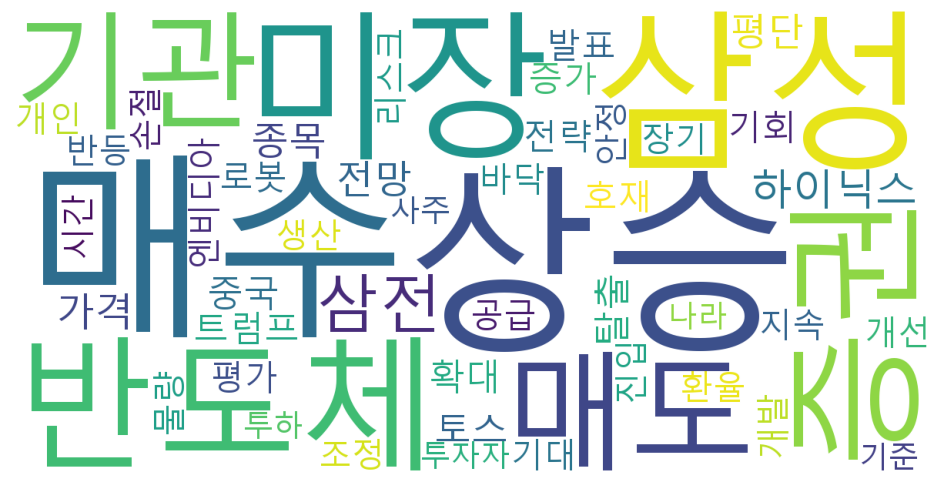

In [91]:
display_word_cloud('KOSPI')

#### 워드 클라우드로 보는 코스닥 시장의 트렌드 



1. 로봇, 초전도체, 로보틱스: 기술 관련 단어들이 포함되어 있으며, 이는 코스닥 시장에서 기술주 또는 혁신적인 기업들이 주목받고 있음을 나타냅니다.
2. 개발, 특허: 새로운 기술의 개발과 관련된 기업들이 주목받고 있으며, 특허 출원과 같은 혁신적인 활동이 이루어지고 있음을 보여줍니다.

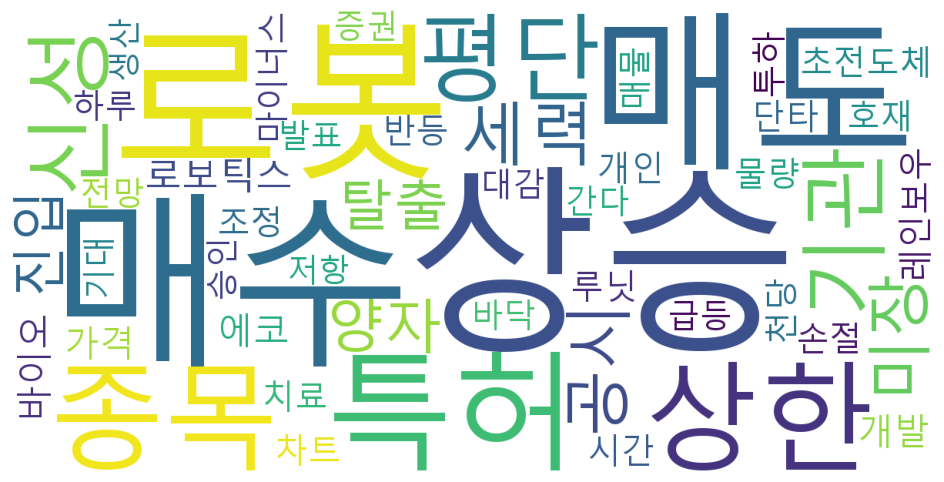

In [92]:
display_word_cloud('KOSDAQ')

#### ETF 시장의 워드클라우드 트렌드 분석

1. 상승, 기준, 지수, 나스닥, 코스피, 다우존스: ETF의 성과를 시장 지수와 비교하는 중요성이 강조되고 있습니다. 투자자들은 ETF가 추종하는 지수의 성과를 분석하여 투자 결정을 내리려는 경향
2. 매수, 배당률, 수익률, 안정, 장기: 투자자들이 안정적인 수익을 추구하고 있으며, 장기적인 투자 전략을 세우고 있다는 것을 나타냅니다. 배당률은 안정적인 수익을 제공하는 ETF에 대한 관심을 반영합니다.
3. 수수료, 인하: 투자자들이 비용을 줄이기 위해 수수료 인하를 고려하고 있다는 것을 나타냅니다. 이는 투자 효율성을 높이기 위한 전략으로 해석될 수 있습니다
4. 테크, 리츠, 테슬라: 특정 산업(테크, 리츠)과 관련된 ETF에 대한 관심이 높아지고 있으며, 이는 기술 혁신과 관련된 투자에 대한 긍정적인 전망을 반영합니다.
5. 달러, 환율: 외환 변동성이 ETF 투자에 미치는 영향을 고려하는 투자자들이 많다는 것을 보여줍니다. 특히, 달러와 관련된 ETF에 대한 관심이 높아지고 있습니다.
6. 금리, 영향, 비교: 시장의 금리가 투자자 행동에 미치는 영향을 분석하고 있으며, 이는 투자자들이 금리 변화에 민감하게 반응하고 있음을 나타냅니다.

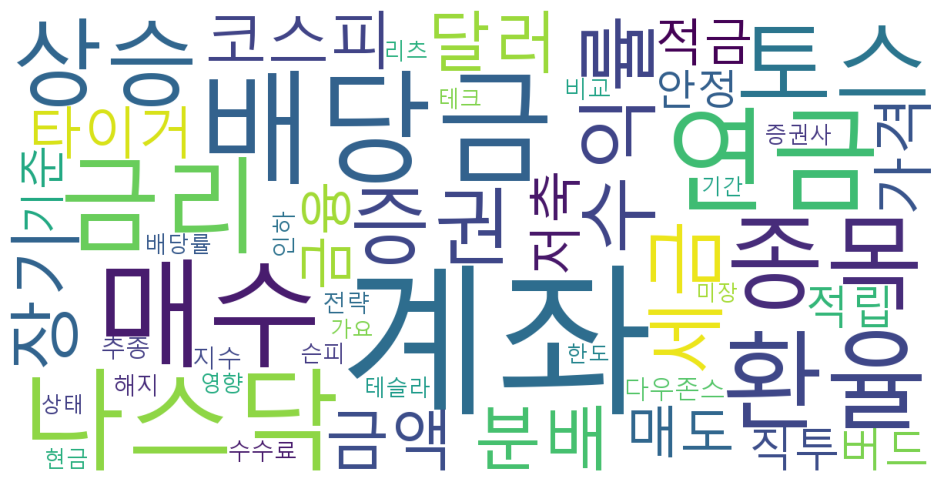

In [93]:
display_word_cloud('ETF')